In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# load data
data = pd.read_csv('data_withCluster.csv')
data = data.drop(data.columns[0], axis=1)  
data = data.drop('id', axis=1)  
data = data.dropna() 
data = data
data_copy = data
data = data[data['Cluster'] == 0]

In [2]:
data = data.drop("Cluster", axis = 1)

In [3]:

# rating column lists
rating_columns = [
    'Inflight wifi service', 
    'Departure/Arrival time convenient', 
    'Ease of Online booking', 
    'Gate location', 
    'Food and drink', 
    'Online boarding', 
    'Seat comfort', 
    'Inflight entertainment',
    'On-board service', 
    'Leg room service', 
    'Baggage handling', 
    'Checkin service',
    'Inflight service', 
    'Cleanliness'
]

delay_columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Convert Value
for column in rating_columns + delay_columns:
    if column in delay_columns:
        data[column] = pd.cut(data[column].astype(int), bins=[-1, 15, 60, 180, 1440], labels=['None', 'Short', 'Medium', 'Long'])
    else:
        data[column] = pd.cut(data[column].astype(int), bins=[0, 2, 3, 5], labels=['Low', 'Medium', 'High'])

# Convert Value
data['Age'] = pd.cut(data['Age'], bins=[0, 18, 35, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
data['Flight Distance'] = pd.cut(data['Flight Distance'], bins=[0, 500, 1000, 2000, 4000], labels=['Short', 'Medium', 'Long', 'Very Long'])

# One Hot Coding
data_encoded = pd.get_dummies(data)
display(data_encoded)


# Using Apriori
frequent_itemsets = apriori(data_encoded, min_support=0.5, use_colnames=True)

# Association Rule
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Filter the rules
rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and any(item in x for item in ['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied']))]

# Format the output
def format_itemset(itemset):
    formatted = []
    for item in itemset:
        
        if any(rating in item for rating in rating_columns + delay_columns):
            formatted.append(item)
        else:
            
            formatted.append(item.split('_')[-1])
    return ', '.join(formatted)

# Apply the formatting
rules['antecedents'] = rules['antecedents'].apply(format_itemset)
rules['consequents'] = rules['consequents'].apply(format_itemset)

# Show all
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

# Show rules
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age_Child,Age_Young Adult,Age_Adult,Age_Senior,Type of Travel_Business travel,Type of Travel_Personal Travel,...,Departure Delay in Minutes_None,Departure Delay in Minutes_Short,Departure Delay in Minutes_Medium,Departure Delay in Minutes_Long,Arrival Delay in Minutes_None,Arrival Delay in Minutes_Short,Arrival Delay in Minutes_Medium,Arrival Delay in Minutes_Long,satisfaction_neutral or dissatisfied,satisfaction_satisfied
1,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
5,1,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
6,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
8,1,0,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103895,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
103898,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
103899,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
103902,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


c:\Users\seanl\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
6,Loyal Customer,neutral or dissatisfied,0.673583,0.881033,1.013077
8,Eco,neutral or dissatisfied,0.541341,0.904114,1.039618
9,Inflight wifi service_Low,neutral or dissatisfied,0.531878,0.964853,1.109459
17,Food and drink_Low,neutral or dissatisfied,0.570047,0.860197,0.989118
29,Inflight entertainment_Low,neutral or dissatisfied,0.619978,0.868061,0.998160
31,Cleanliness_Low,neutral or dissatisfied,0.578373,0.864008,0.993500
34,Departure Delay in Minutes_None,neutral or dissatisfied,0.646358,0.856317,0.984657
36,Arrival Delay in Minutes_None,neutral or dissatisfied,0.634357,0.853601,0.981534
57,"Inflight entertainment_Low, Food and drink_Low",neutral or dissatisfied,0.517710,0.866139,0.995951
62,"Cleanliness_Low, Food and drink_Low",neutral or dissatisfied,0.511366,0.862621,0.991905


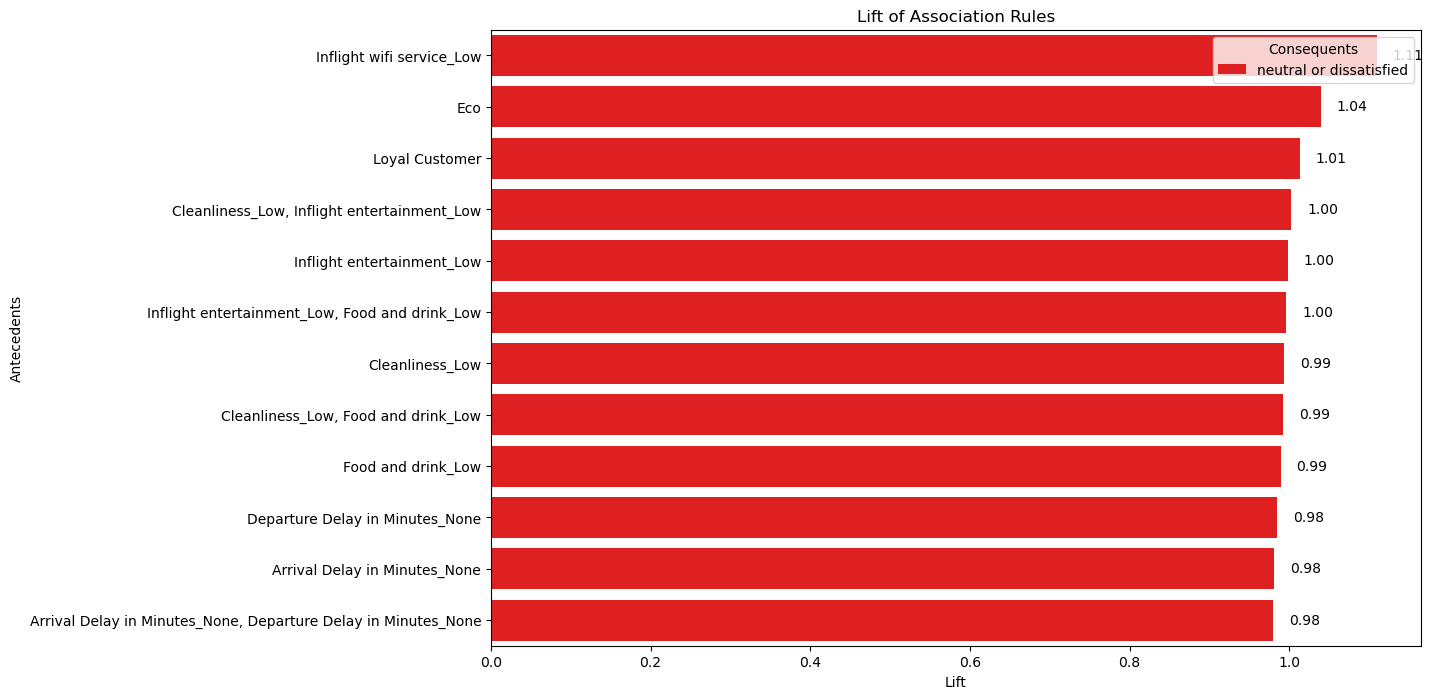

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


rules = rules.sort_values(by='lift', ascending=False)


palette = {'satisfied': 'green', 'neutral or dissatisfied': 'red'}


plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='lift', y='antecedents', hue='consequents', data=rules,
    dodge=False, palette=palette
)


plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Lift of Association Rules')
plt.legend(title='Consequents')


for p in barplot.patches:
    width = p.get_width()  
    if width > 0:  
        plt.text(p.get_x() + width + 0.02,  
                 p.get_y() + p.get_height() / 2,  
                 '{:.2f}'.format(width),  
                 va='center', ha='left') 

plt.show()